<img src="./logo_UTN_FRBA.svg" align="right" width="150">

#### Teoría de Circuitos II

## Problema desafío

Se pide diseñar un filtro pasabajo que satisfaga la siguiente plantilla:

- $f_p=500Hz$
- $f_s=1500Hz$
- $\alpha_{max}=1dB$
- $\alpha_{min}=18dB$

a) Determine si el siguiente diseño puede realizarse con una sola sección de segundo orden cuya respuesta de módulo es de **máxima planicidad**.

In [107]:
import math as m

# Condiciones de diseño
f_p = 500
f_s = 1500
alpha_max = 1
alpha_min = 18

# Paso de F a w
w_p = 2 * m.pi * f_p
w_s = 2 * m.pi * f_s

# Normalizo respecto de w_p
w_p_n = w_p / w_p
w_s_n = w_s / w_p

Para maxima planicidad -> Butterworth 

<center>$|T_B(\omega)|^2 = \frac{1}{1 + \epsilon^2 \omega^{2 n}}$ (1)</center>

Para $\omega=1$:

<center>$\epsilon^2 = 10^{\alpha_{max}/10}-1$</center>    

In [108]:
epsilon_sq = pow(10,0.1*alpha_max)-1
text_e = '\epsilon^2 = %s'

display(Math(text_e %epsilon_sq))


<IPython.core.display.Math object>

Para $\omega=\omega_s$

<center>$\alpha_{min}=10 log(1 + \epsilon^2 \omega^{2n})$</center>
    
De donde:

<center>$10^{\alpha_{min}/10}=1 + \epsilon^2 \omega_{sN}^{2n} = \frac{1}{|T(\omega)|^2}$ (2)</center>

Entonces despejando n de (1) y remplazando por (2):

<center>$n = \frac{log(10^{\alpha_{min}/10} - 1)}{2 \epsilon^2 log(\omega_{sN})}$</center>

In [109]:
nb = (m.log(pow(10,0.1*alpha_min)-1))/(2*epsilon_sq*(m.log(w_s_n)))
nb = m.ceil(nb)
display(Math('n = %s'%nb))

if ( nb > 2 ):
    print("El filtro no se puede realizar con las condiciones dadas")
else:
    print("El filtro puede realizarse con un Butterworth de 2do orden")

<IPython.core.display.Math object>

El filtro no se puede realizar con las condiciones dadas



b) Si el mismo diseño se planteara mediante una aproximación **Chebyshev**, se pide:

- la función transferencia normalizada
- las respuestas de módulo, fase y la localización de polos y ceros

Transferencia Chebyshev: 

<center>$|T_C(\omega)|^2 = \frac{1}{1 + \epsilon^2 C_n^2(\omega)}$ (3)</center>
<p></p>
<p></p>
<center>$n = \frac{acosh(\sqrt{\frac{10^{0.1 \alpha_{min} - 1}}{10^{0.1 \alpha_{max} - 1}}})}{acosh(\omega_s)}$</center>

In [110]:
import scipy.signal as signal
from IPython.display import Math

# Compruebo que se pueda realizar con un Chebyshev de 2do orden

nc = (m.acosh(m.sqrt((m.pow(10,0.1*alpha_min)-1)/(m.pow(10,0.1*alpha_max)-1))))/(m.acosh(w_s_n))
nc = m.ceil(nc)

display(Math('n = %s'%nc))
if ( nc > 2 ):
    print("El filtro no se puede realizar con las condiciones dadas")
else:
    print("El filtro puede realizarse con un Chebyshev de 2do orden")

# Utilizo la funcion cheb1ap para calcular z,p,k y luego la 
(zc,pc,kc) = signal.cheb1ap(nc,alpha_max)
(tfc_num,tfc_den) = signal.zpk2tf(zc,pc,kc)

# Polos
print("\nPolos en: ")
print(pc)
display(Math('k = %s'%kc))

# Armo la función transferencia
#print("\n")
#print(tfc_num)
#print(tfc_den)
equation = r'T(s) = \frac{'+str(tfc_num[0])+'}{'+str(tfc_den[0])+' s^2 + '+str(tfc_den[1])+' s + '+str(tfc_den[2])+'}'
display(Math(equation))

#display.Math(rf'\int_{{t=0}}^1 \frac{{1}}{{1+t^2}}\,\text{{d}}t = ')



<IPython.core.display.Math object>

El filtro puede realizarse con un Chebyshev de 2do orden

Polos en: 
[-0.54886716+0.89512857j -0.54886716-0.89512857j]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

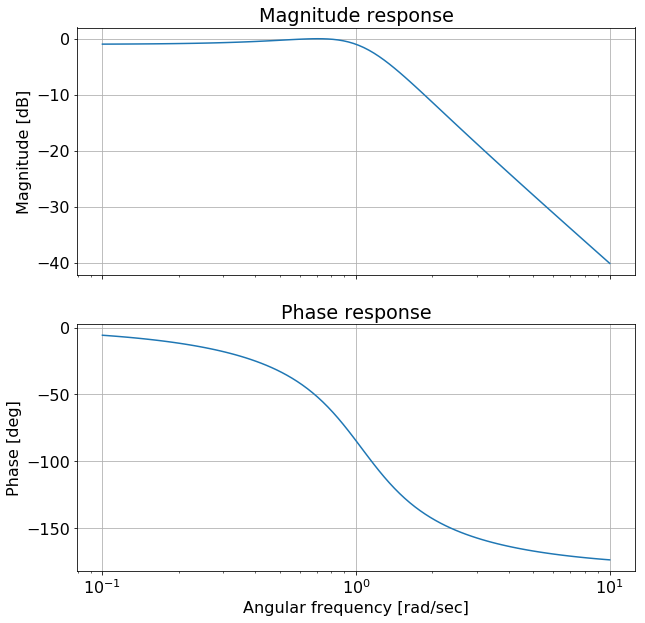

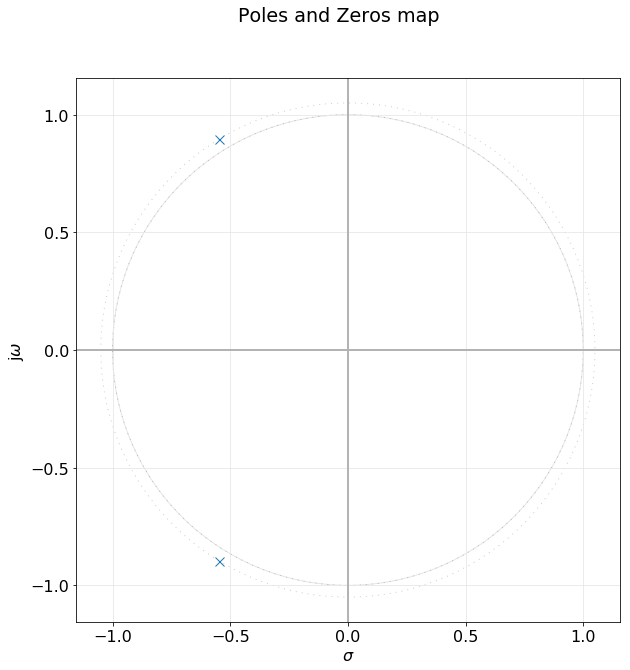

In [111]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

#fig_font_family = 'Ubuntu'
#fig_font_size = 16

#plt.rcParams.update({'font.size':fig_font_size})
#plt.rcParams.update({'font.family':fig_font_family})

# un módulo adaptado a mis necesidades
from splane import bodePlot, pzmap
        
tfc = signal.TransferFunction( tfc_num, tfc_den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(tfc)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
#plt.ylim([-1,1])

plt.gca

pzmap(tfc)

plt.show()

c) Implemente el filtro solicitado mediante la siguiente red y corrobore su funcionamiento respecto a la plantilla de requerimientos.
<img src="./ackmoss.png" align="center">

<img src="./resolucion_ackmoss.jpg" align="center">

In [116]:
# calculo de los componentes normalizados
# imponiendo C y usando R1=R
C = 100e-9   # impongo C de forma que la desnormalizada sea 
C_n = C * w_p   
k = tfc_num[0]/tfc_den[2]
Q = m.sqrt(tfc_den[2]) / tfc_den[1]
R = 1 / (C_n * m.sqrt(tfc_den[2]))
R_k = R/k/1000
R_Q = R*Q/1000

print('R = %s kΩ' % (R/1000))
print('C = %s nF' % (C*1e9))
print('Q = %s' % Q)
print('k = %s' % k)
print('R/k = %s kΩ' % R_k)
print('R*Q = %s kΩ' % R_Q)



R = 3.03150852624 kΩ
C = 100.0 nF
Q = 0.9565200711933589
k = 0.8912509381337455
R/k = 3.4014085108101595 kΩ
R*Q = 2.899698751338209 kΩ


Con los valores obtenidos se realiza la simulación en MultiSim:

<img src="./desafio_cheby-schematic.png" align="center">

<img src="./desafio_cheby-Grapher.png" align="center">
